In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp
import math

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [5]:
x.shape

(1056, 29)

In [6]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [8]:
X_test.shape

(212, 29)

In [9]:
X_train.shape

(844, 29)

In [10]:
# scealing is required for indepandent variables at ANN
from sklearn.preprocessing import StandardScaler

In [11]:
scale = StandardScaler()

In [12]:
scale.fit(X_train)

StandardScaler()

In [13]:
x_train = scale.fit_transform(X_train)
x_test = scale.fit_transform(X_test)

In [15]:
KernelRidge?

In [14]:
  #regressor = tree.DecisionTreeRegressor()
#regressor = linear_model.Ridge(alpha=18, fit_intercept=True,normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='lsqr', random_state=0,)
  #regressor = ElasticNet(random_state=0)
regressor = KernelRidge(alpha=0.1, degree=1, kernel='linear')

In [15]:
 regressor.fit(X_train, y_train)

KernelRidge(alpha=0.1, degree=1)

In [16]:
# compute the testing accuracy
y_pred = regressor.predict(X_test)

In [17]:
y_pred_train = regressor.predict(X_train)

In [18]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [20]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)
  rmse = round(math.sqrt(mse),4)

In [21]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.3072933190399746
MSE is 0.4079
R2 score is 0.36279805946671717


In [22]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)
rmseTrain = round(math.sqrt(mseTrain),4)

In [23]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(rmseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.30052573784387965
MSE is 0.396
R2 score is 0.32086301287707675


In [24]:
cvscoretrain = (cross_val_score(regressor,X_train,y_train.ravel(),cv=5).mean())

In [25]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,X_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
[0.28693949 0.23821797 0.26790176 0.27544657 0.28865654]
Q2 is 0.2714324655832085


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

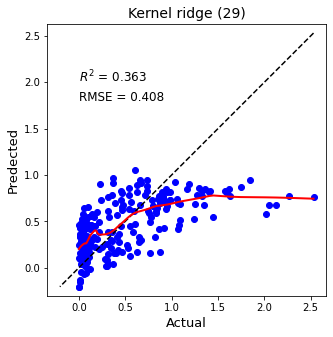

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o', linewidth=1)
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='black', linestyle='dashed')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.363', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.408', fontsize = 12)
plt.title('Kernel ridge (29)', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], 'r-', linewidth=2)

plt.show()

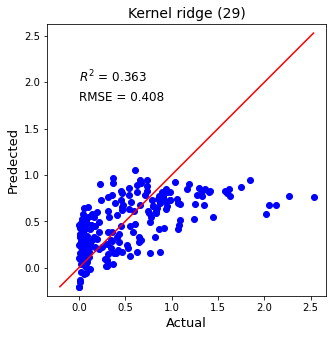

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.363', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.408', fontsize = 12)
plt.title('Kernel ridge (29)', fontsize = 14)
plt.show()

In [39]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [41]:
# creatting parameter gride
param_grid_regressor= {'alpha':[1,2,5,10,50,3, 5, 8, 10, 20, 50, 100,200, 230, 250,265, 270, 275, 290, 300, 500,600,700,800],
             'degree':[2,3,4] } 

In [44]:
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions=param_grid_regressor, n_iter = 100,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring = 'neg_mean_squared_error' )

In [45]:

regressor_random.fit (X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


RandomizedSearchCV(cv=5, estimator=KernelRidge(alpha=1.0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 50, 3, 5, 8, 10,
                                                  20, 50, 100, 200, 230, 250,
                                                  265, 270, 275, 290, 300, 500,
                                                  600, 700, 800],
                                        'degree': [2, 3, 4]},
                   scoring='neg_mean_squared_error', verbose=2)

In [46]:
regressor_random.best_params_

{'degree': 2, 'alpha': 1}

In [47]:
regressor_random.best_score_

-0.17644944944803403

In [59]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid_regressor= {'alpha':[0.1, 0.2, 0.3, 0.4, 0.5,1, 1.5, 2,5,10,50,3, 5, 8, 10, 20, 50, 100,200, 230, 250,265, 270, 275, 290, 300, 500,600,700,800],
             'degree':[1,2,3,4, 5] } 

In [76]:
regressor_grid = GridSearchCV(estimator =regressor, param_grid=param_grid_regressor,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")

regressor_grid.fit (X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KernelRidge(alpha=0.5, degree=1), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2, 5, 10,
                                   50, 3, 5, 8, 10, 20, 50, 100, 200, 230, 250,
                                   265, 270, 275, 290, 300, 500, 600, 700,
                                   800],
                         'degree': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=2)

In [77]:
regressor_grid.best_params_

{'alpha': 0.1, 'degree': 1}

In [78]:
regressor_grid.best_score_

-0.17002759592647396